In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import sklearn
from IPython.display import display
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

2.3.1
2.4.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


In [4]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

print("train data shape:", X_train.shape)
print("valid data shape:", X_valid.shape)
print("test data shape:", X_test.shape)

train data shape: (55000, 28, 28)
valid data shape: (5000, 28, 28)
test data shape: (10000, 28, 28)


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', "Sneaker", 'Bag', 'Ankle boot']

class_names[y_train[0]]

'Coat'

In [6]:
model = keras.models.Sequential(name="hankyul_first_nn_network")
model.add(keras.layers.Flatten(input_shape=[28, 28], name='input'))
model.add(keras.layers.Dense(300, activation='relu', name='dense1'))
model.add(keras.layers.Dense(100, activation='relu', name='dense2'))
model.add(keras.layers.Dense(10, activation='softmax', name='output'))

In [7]:
model.summary()

Model: "hankyul_first_nn_network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Flatten)              (None, 784)               0         
_________________________________________________________________
dense1 (Dense)               (None, 300)               235500    
_________________________________________________________________
dense2 (Dense)               (None, 100)               30100     
_________________________________________________________________
output (Dense)               (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.layers

In [9]:
hidden1 = model.layers[1]
hidden2 = model.get_layer('dense2')
print('name of hidden layer 1:', hidden1.name)
print('name of hidden layer 2:', hidden2.name)

name of hidden layer 1: dense1
name of hidden layer 2: dense2


In [10]:
weights, biases = hidden1.get_weights()
print("shape of weight of hidden layer 1:", weights.shape)
print("shape of bias of hidden layer 1:", biases.shape)
print('weights of hidden layer 1:\n', weights)
print('bias of hidden layer 1:\n', biases)

shape of weight of hidden layer 1: (784, 300)
shape of bias of hidden layer 1: (300,)
weights of hidden layer 1:
 [[-0.01442412 -0.0629551  -0.05972857 ... -0.04071765  0.02096095
  -0.03286661]
 [-0.01050799  0.05115792  0.02775685 ... -0.01560053  0.03449214
   0.06633423]
 [ 0.04366536 -0.00439599  0.07260554 ...  0.04919943 -0.05839291
   0.04580145]
 ...
 [-0.00025924  0.0475973   0.03471945 ... -0.00657196 -0.03087362
   0.0420773 ]
 [ 0.00203111  0.03935971 -0.03441035 ... -0.00415589  0.05250262
  -0.03250554]
 [-0.0061494   0.02478922  0.00222142 ...  0.01607174  0.05633612
  -0.01902773]]
bias of hidden layer 1:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 

In [11]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [12]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7269 - accuracy: 0.7612 - val_loss: 0.4989 - val_accuracy: 0.8320

params: {'verbose': 1, 'epochs': 30, 'steps': 1719}
epoch: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


(0.0, 1.0)

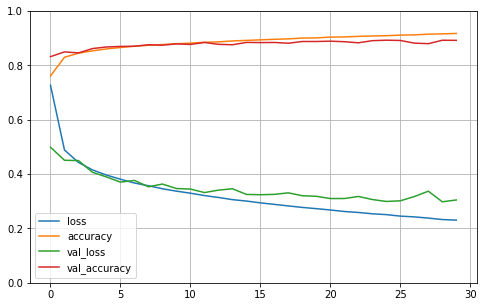

In [13]:
print("params:", history.params)
print("epoch:", history.epoch)
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

In [14]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.3365 - accuracy: 0.8816


[0.3365245461463928, 0.881600022315979]

In [15]:
X_new = X_test[:3]
y_prob = model.predict(X_new)
y_prob.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [16]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1], dtype=int64)

In [17]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [18]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

Epoch 1/30
436/436 [==============================] - 1s 2ms/step - loss: 1.5915 - val_loss: 0.4253
Epoch 2/30
436/436 [==============================] - 1s 1ms/step - loss: 0.4562 - val_loss: 0.3874

array([[1.8101114],
       [2.6167471],
       [1.4322828]], dtype=float32)

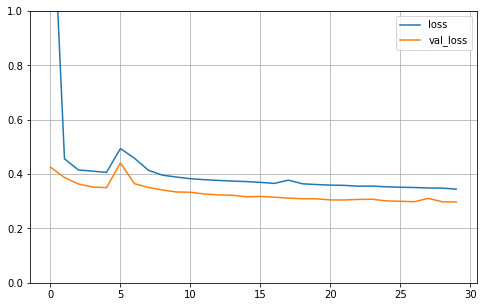

In [19]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, random_state=0)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', name='dense1', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
],
    name="hankyul_regression_first_model")

model.compile(optimizer='sgd', loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=30, validation_split=.1)

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

model.evaluate(X_test_scaled, y_test)

X_new = X_test_scaled[:3]

model.predict(X_new)

In [20]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 30)           930         dense_1[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_2[0][0]         

In [21]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, random_state=0)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation='relu', name='dense1')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu', name='dense2')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])
model.summary()

model.compile(loss=['mse', 'mse'], loss_weights=[.9, .1], optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train_scaled[:, :5], X_train_scaled[:, 2:]
X_test_A, X_test_B = X_test_scaled[:, :5], X_test_scaled[:, 2:]

# model.fit((X_train_A, X_train_B), [y_train, y_train], epochs=20, validation_split=.1)
# total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), [y_test, y_test])

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense1 (Dense)                  (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense2 (Dense)                  (None, 30)           930         dense1[0][0]                     
_______________________________________________________________________________________

In [22]:
class WideDeepModel(keras.Model):
    def __init__(self, unit=30, activation='relu', **kwargs):
        super().__init__(**kwargs)
        self.dense1 = keras.layers.Dense(unit, activation=activation, name='dense1')
        self.dense2 = keras.layers.Dense(unit, activation=activation, name='dense2')
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.dense1(input_B)
        hidden2 = self.dense2(hidden1)
        concat = keras.layers.Concatenate()([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(concat)

        return main_output, aux_output

# model = WideDeepModel()

In [23]:
model.save("my_keras_model.h5")

In [24]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

model.fit((X_train_A, X_train_B), [y_train, y_train],
          callbacks=[checkpoint_cb], epochs=20, validation_split=.1)

model = keras.models.load_model("my_keras_model.h5")

Epoch 1/20
436/436 [==============================] - 1s 2ms/step - loss: 2.2831 - output_loss: 2.0258 - aux_output_loss: 4.5990 - val_loss: 1.1287 - val_output_loss: 0.8836 - val_aux_output_loss: 3.3344

In [25]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

model.fit((X_train_A, X_train_B), [y_train, y_train],
          callbacks=[checkpoint_cb, early_stopping_cb], epochs=20, validation_split=.1)

Epoch 1/20
436/436 [==============================] - 1s 3ms/step - loss: 0.4605 - output_loss: 0.4464 - aux_output_loss: 0.5882 - val_loss: 0.4248 - val_output_loss: 0.4109 - val_aux_output_loss: 0.5498

In [26]:
import os

root_log_dir = 'my_log_dir'

def get_run_logdir():
    import time
    log_file = time.strftime("run_%Y_%m_d-%H_%M_%S")
    return os.path.join(root_log_dir, log_file)

tensorboard_cb = keras.callbacks.TensorBoard(get_run_logdir())

model.fit((X_train_A, X_train_B), [y_train, y_train],
          callbacks=[tensorboard_cb], epochs=30, validation_split=.1)

Epoch 1/30
  1/436 [..............................] - ETA: 0s - loss: 0.3065 - output_loss: 0.2962 - aux_output_loss: 0.3989WARNING:tensorflow:From C:\Users\consi\anaconda3\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
436/436 [==============================] - 1s 2ms/step - loss: 0.4175 - output_loss: 0.4100 - aux_output_loss: 0.4845 - val_loss: 0.3851 - val_output_loss: 0.3782 - val_aux_output_loss: 0.4478

In [27]:
%load_ext tensorboard
%tensorboard --logdir=./my_log_dir --port=6006

Launching TensorBoard...

In [28]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)
with writer.as_default():
    for step in range(1, 1000+1):
        tf.summary.scalar("my_scalar", np.sin(step/10), step=step)
        data = (np.random.randn(100) + 2) * step / 100
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        images = np.random.rand(2, 32, 32, 3)
        tf.summary.image("my_images", images * step / 1000, step=step)
        texts = ["The step is " + str(step), "Its square is " + str(step**2)]
        tf.summary.text("my_text", texts, step=step)
        sine_wave = tf.math.sin(tf.range(12000)/48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1,-1,1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

In [29]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

print("train dataset shape:", X_train.shape)
print("train target shape:", y_train.shape)
print("test dataset shape:", X_test.shape)
print("test target shape:", y_test.shape)
print("target list:\n", np.unique(y_train))

train dataset shape: (60000, 28, 28)
train target shape: (60000,)
test dataset shape: (10000, 28, 28)
test target shape: (10000,)
target list:
 [0 1 2 3 4 5 6 7 8 9]


In [30]:
print("sample data:\n", X_train[:1])

sample data:
 [[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126
   136 175  26 166 255 247 127   0   0   0   0]
  [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253
   253 225 172 253 242 195  64   0   0   0   0]
  [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253
   251  93  82  82  56  39   0   0   0   0   0]
  [  0   0   0   0   0   0   0  18

In [31]:
X_train = X_train / 255
X_test = X_test / 255

In [32]:
def build_model(units = 400, activation='relu', learning_rate=3e-3):
    input_ = keras.layers.Input(shape=X_train.shape[1:], name="input_layer")
    flatten = keras.layers.Flatten(input_shape=[28,28], name="flatten_layer")(input_)
    hidden1 = keras.layers.Dense(units, activation=activation, name='dense_layer_1')(flatten)
    hidden2 = keras.layers.Dense(units, activation=activation, name='dense_layer_2')(hidden1)
    hidden3 = keras.layers.Dense(units, activation=activation, name='dense_layer_3')(hidden2)
    output = keras.layers.Dense(10, activation='softmax', name='output_layer')(hidden3)
    model = keras.Model(inputs=[input_], outputs=[output])
    model.compile(optimizer=keras.optimizers.SGD(lr=learning_rate), loss="sparse_categorical_crossentropy", metrics=['accuracy'])
    return model

model = build_model()
model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_layer (Flatten)      (None, 784)               0         
_________________________________________________________________
dense_layer_1 (Dense)        (None, 400)               314000    
_________________________________________________________________
dense_layer_2 (Dense)        (None, 400)               160400    
_________________________________________________________________
dense_layer_3 (Dense)        (None, 400)               160400    
_________________________________________________________________
output_layer (Dense)         (None, 10)                4010      
Total params: 638,810
Trainable params: 638,810
Non-trainable params: 0
________________________________________________

In [33]:
hidden1 = model.get_layer('dense_layer_1')
weights, biases = hidden1.get_weights()
print("dense_layer_1 weights shape:", weights.shape)

dense_layer_1 weights shape: (784, 400)


In [34]:
root_log_dir = 'my_logs'
root_checkpoint_dir = 'my_checkpoints'

def get_checkpoint_dir():
    import time, os
    checkpoint = time.strftime("cp_%Y_%m_d-%H_%M_%S.h5")
    return os.path.join(root_checkpoint_dir, checkpoint)

def get_log_dir():
    import time, os
    log_file = time.strftime("run_%Y_%m_d-%H_%M_%S")
    return os.path.join(root_log_dir, log_file)

tensorboard_cb = keras.callbacks.TensorBoard(get_log_dir())
checkpoint_cb = keras.callbacks.ModelCheckpoint(get_checkpoint_dir(), save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [35]:
model.fit(X_train, y_train, epochs=100, validation_split=.1,
          callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb]
)

model.evaluate(X_test, y_test)

Epoch 1/100
1688/1688 [==============================] - 9s 5ms/step - loss: 1.1139 - accuracy: 0.7437 - val_loss: 0.4196 - val_accuracy: 0.9017

KeyboardInterrupt: 

In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

keras_clf = keras.wrappers.scikit_learn.KerasClassifier(build_model)

param_distribs = {
    "learning_rate":reciprocal(3e-4, 3e-3, 3e-2, 3e-1)
}

rnd_search_cv = RandomizedSearchCV(keras_clf, param_distribs, n_iter=5, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100, validation_split=.1,
          callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb]
)